<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/OpenCvTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像をダウンロード

In [8]:
import urllib.request

url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
urllib.request.urlretrieve(url, "lena.png") 

('lena.png', <http.client.HTTPMessage at 0x7fd9be538e48>)

そのまま表示すると BGR で表示

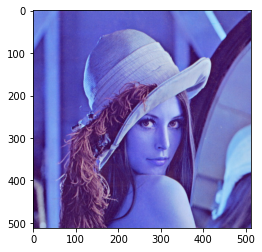

In [9]:
import cv2
import matplotlib.pyplot as plt

lena_bgr = cv2.imread("lena.png")
plt.imshow(lena_bgr)
plt.show()

RGB に変換すれば元の色に

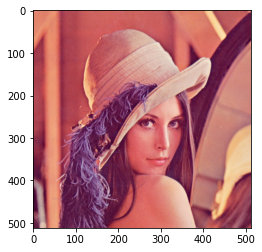

In [10]:
lena_rgb = cv2.cvtColor(lena_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(lena_rgb)
plt.show()